In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
data = pd.read_csv('/content/Housing.csv')

In [63]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['furnishingstatus'] = le.fit_transform(data['furnishingstatus'])

In [65]:
data['prefarea'] = le.fit_transform(data['prefarea'])

In [66]:
data['airconditioning'] = le.fit_transform(data['airconditioning'])

In [67]:
data['hotwaterheating'] = le.fit_transform(data['hotwaterheating'])

In [68]:
data['basement'] = le.fit_transform(data['basement'])

In [69]:
data['guestroom'] = le.fit_transform(data['guestroom'])

In [70]:
data['mainroad'] = le.fit_transform(data['mainroad'])

In [71]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [72]:
X = data.iloc[:,1:].values

In [73]:
y = data.iloc[:,0].values

In [74]:
print(X)

[[7420    4    2 ...    2    1    0]
 [8960    4    4 ...    3    0    0]
 [9960    3    2 ...    2    1    1]
 ...
 [3620    2    1 ...    0    0    2]
 [2910    3    1 ...    0    0    0]
 [3850    3    1 ...    0    0    2]]


In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = lr.predict(X_test)

In [79]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, y_pred))
r2_score(y_test, y_pred)

986041803890.0236


0.6578047592637606

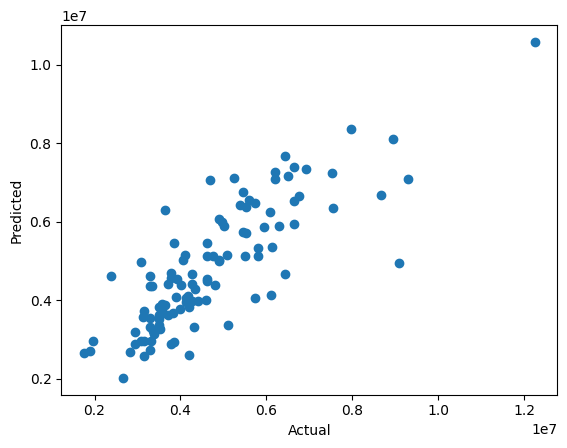

In [83]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()